In [1]:
import sys
import os
sys.path.insert(0, "../../python")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('presentation')
import beam.calc.electron as ecalc
from lens import profile
from scipy.optimize import minimize
import scipy.constants as const
me = const.physical_constants['electron mass energy equivalent in MeV'][0]

green = '#228833'
purple = '#AA3377'
cyan = '#66CCEE'
red = '#EE6677'
# Not from the color palette
grey = '#444444'
denSize = 14

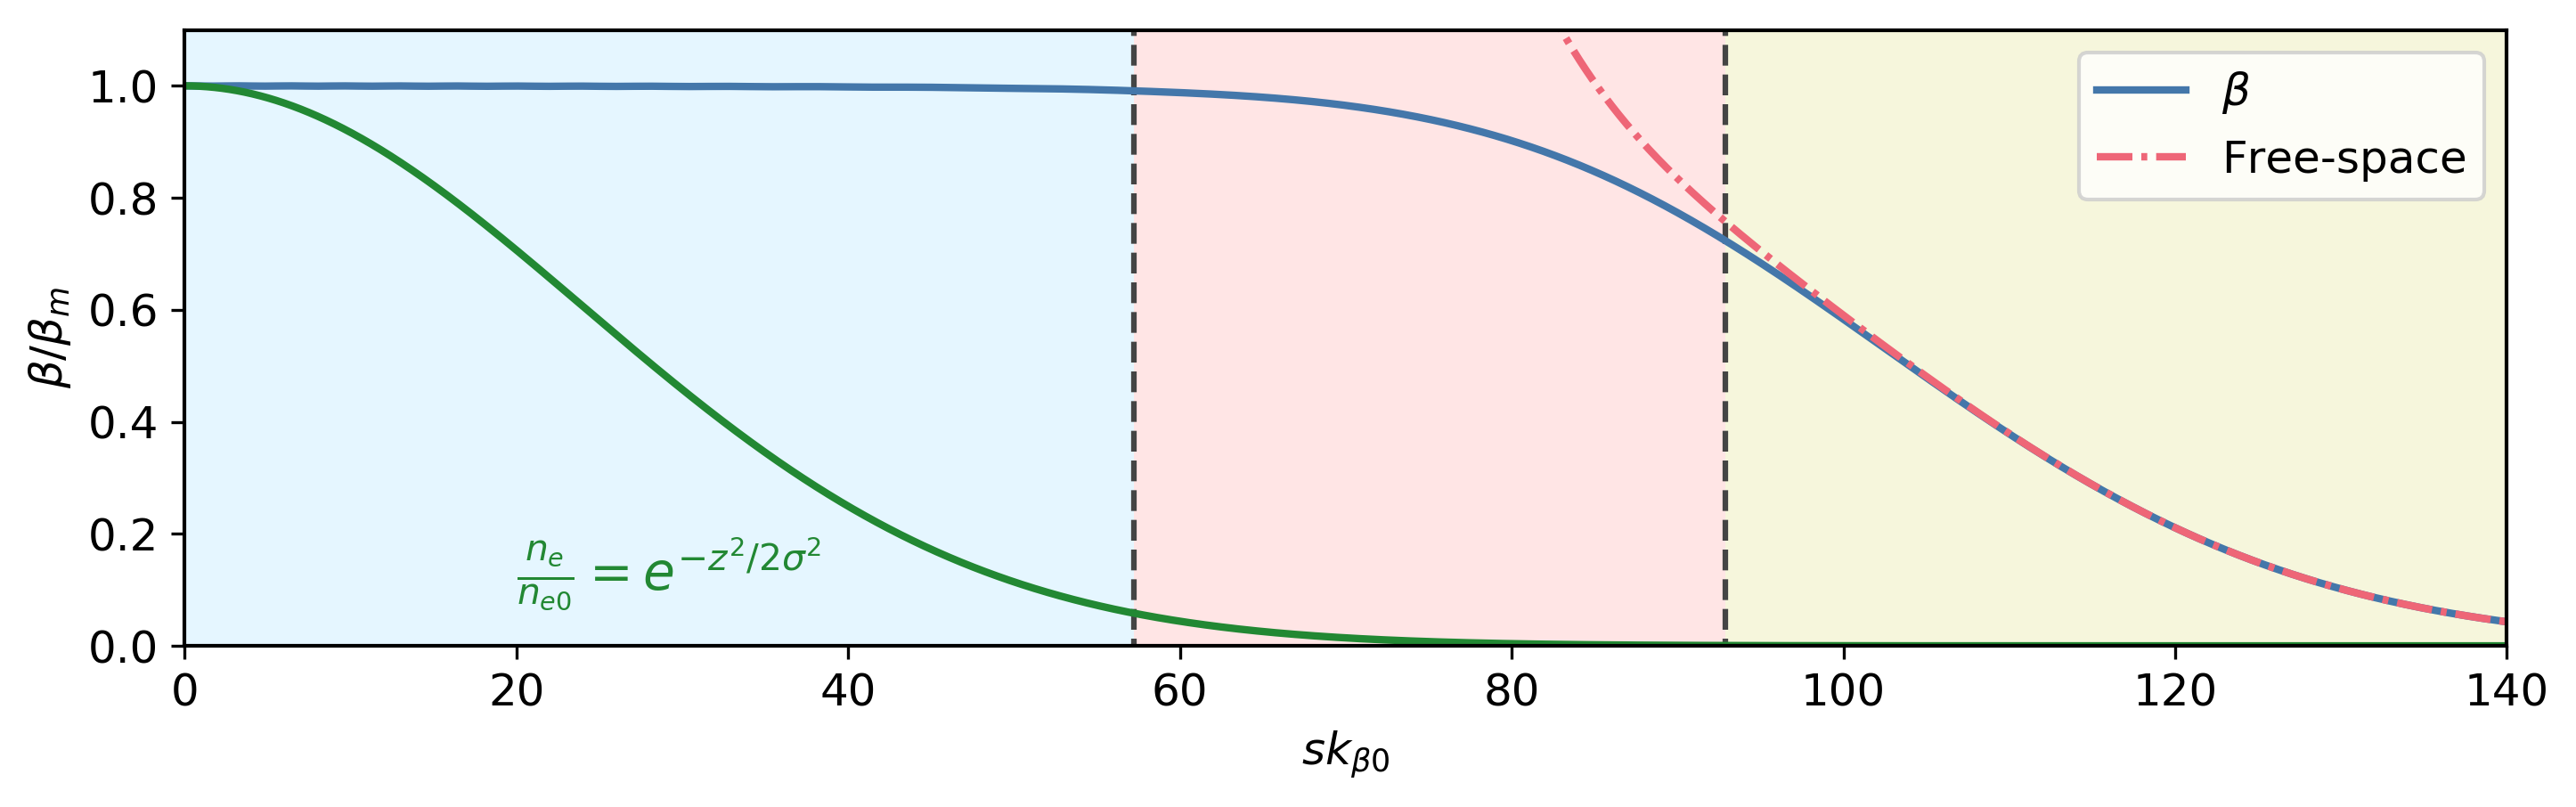

In [2]:
N = 10000
beta0 = 1
alpha0 = 0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 24
z = np.linspace(0, 250, N)
frac = np.exp(-z**2/(2*a**2))
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

tran = 0.85
# Transition to perturbed propagation
tran1 = z[-np.array(alpha)<=tran][-1]

tran = 0.1
# Transition from adiabatic propagation
tran2 = z[-np.array(alpha)<=tran][-1]

# Calculate the free space propagation
bs = 1/gamma[-1]
ss = alpha[-1]*bs + 250
betaFree = (z-ss)**2/bs+bs

# Plotting
#------------------------------------------------------------------------------------
mult = np.sqrt(frac)
#mult2 = np.sqrt(fracTran)
#mult = 1
#mult2 = 1

plt.figure(figsize=(9.8, 3.18), dpi=300)

# Plot beam evolution 
plt.plot(z, np.array(beta)*mult)
plt.plot(z, betaFree*mult, '-.')
#plt.plot(z, 1/np.sqrt(frac), 'b--')
plt.xlabel(r'$s k_{\beta0}$')
plt.ylabel(r'$\beta/\beta_m$')
plt.legend([r'$\beta$', 'Free-space', r'Transition'], loc=1)
plt.ylim(0.0, 1.1)
#plt.yscale('log')

# Plot transition points
plt.plot([tran1, tran1], [-1, 1e4], 'k--', c=grey, zorder=1, linewidth=1.5)
plt.plot([tran2, tran2], [-1, 1e4], 'k--', c=grey, zorder=1, linewidth=1.5)

# Regions of the plot
plt.axvspan(0,  tran2, facecolor='#CCEEFF', alpha=0.5, zorder=0)
plt.axvspan(tran2,  tran1, facecolor='#FFCCCC', alpha=0.5, zorder=0)
plt.axvspan(tran1,  140, facecolor='#EEEEBB', alpha=0.5, zorder=0)

# Plot plasma density
#plt.twinx()
plt.plot(z, frac)
plt.text(20, 0.1, r'$\frac{n_e}{n_{e0}}=e^{-z^2/2\sigma^2}$', color=green, fontsize=denSize)
#plt.ylim(0.0, 1.1)
plt.xlim(0, 140)
#plt.legend([r'$n_{e}/n_{e0}$', 'A'], loc=(0.05, .4))
#plt.yscale('log')
plt.tight_layout()
plt.savefig('Gaussian_Beam_Evolution.svg')
plt.show()

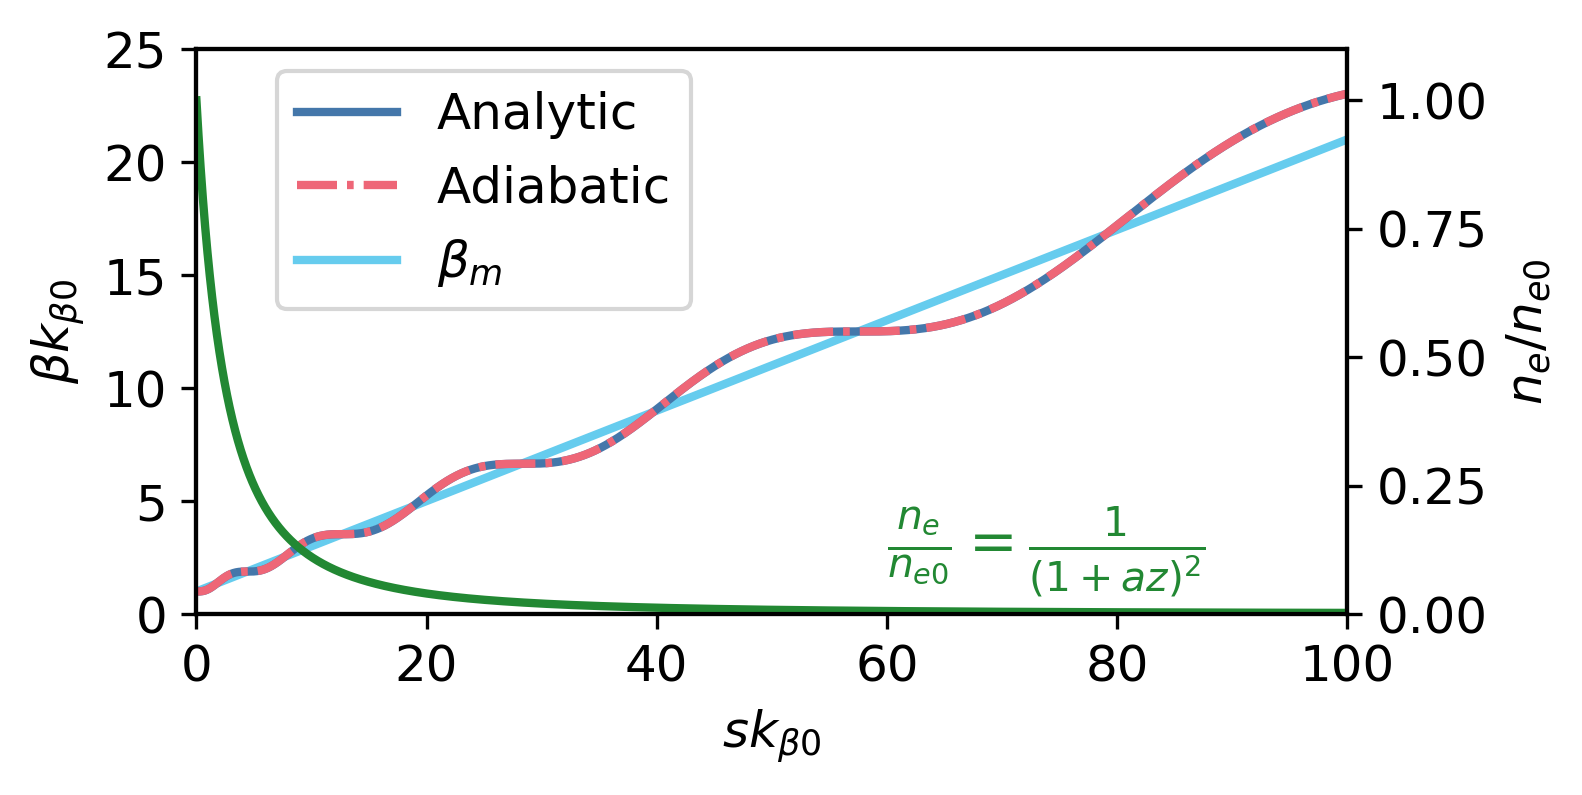

In [3]:
# Possible incoming beams for an adiabatic focuser
N = 5000
beta0 = 1
alpha0 = 0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 0.2
z = np.linspace(0, 100, N)
frac = 1/(1+a*z)**2
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

Delta = a/(a-2)

plt.figure(figsize=(5.33, 2.81), dpi=300)
plt.plot(z, beta)
plt.plot(z, (1+a*z)*(1+1/(4/a**2-1)-1/(4/a**2-1)*np.cos(np.log(1+a*z)*np.sqrt(4/a**2-1))
                     -1/np.sqrt(4/a**2-1)*np.sin(np.log(1+a*z)*np.sqrt(4/a**2-1))), '-.')
plt.plot(z, 1/np.sqrt(frac), c=cyan, zorder=1)
plt.xlabel(r'$s k_{\beta0}$')
plt.ylabel(r'$\beta k_{\beta0}$')
plt.legend([r'Analytic', r'Adiabatic', r'$\beta_m$'], bbox_to_anchor=(.25, .75), loc='center')
plt.ylim(0, 25)
plt.twinx()
plt.plot(z, frac, c=green)
plt.text(60, 0.1, r'$\frac{n_e}{n_{e0}}=\frac{1}{(1+az)^2}$', color=green, fontsize=denSize)
plt.ylim(0, 1.1)
plt.ylabel(r'$n_{e}/n_{e0}$')
plt.xlim(0, 100)
plt.tight_layout()
plt.savefig('Adiabatic_Evolution.svg')
plt.show()

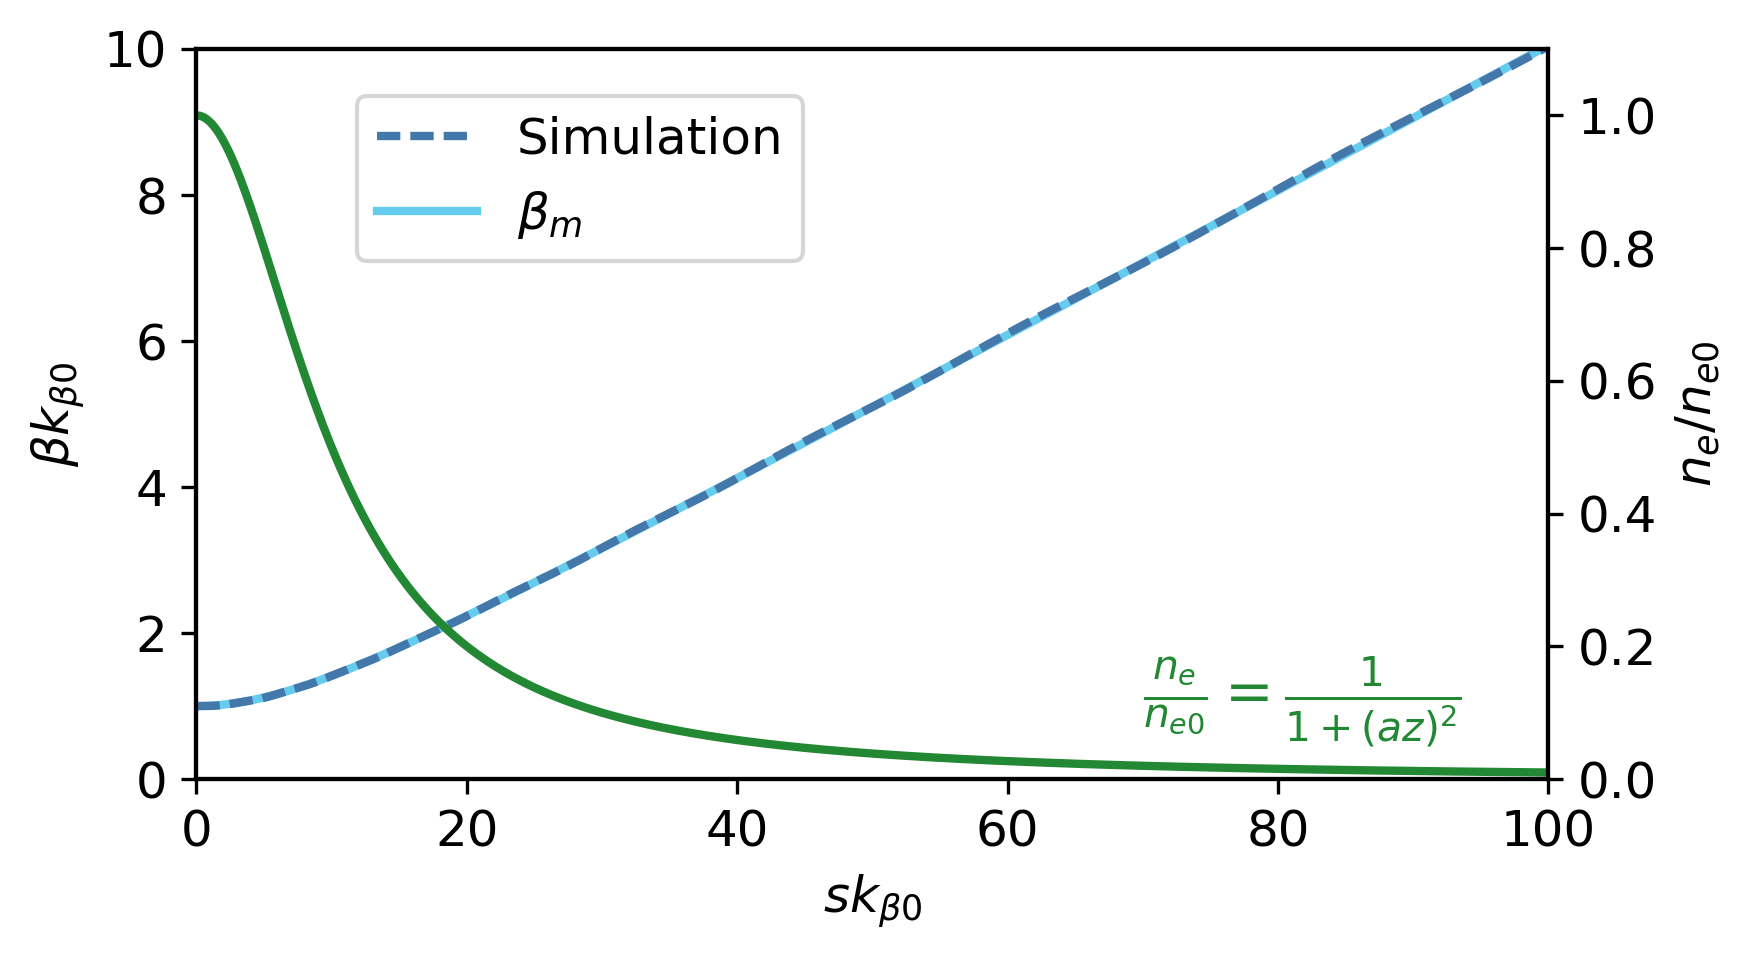

In [4]:
N = 5000
beta0 = 1.0
alpha0 = 0.0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 0.1
z = np.linspace(0, 100, N)
frac = 1/(1+(a*z)**2)
frac2 = 1/(1+a*z)**2
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

plt.figure(figsize=(6, 3.36), dpi=300)
plt.plot(z, beta, '--')
#plt.plot(z, analytic, 'b--')
plt.plot(z, 1/np.sqrt(frac), c=cyan, zorder=1)
plt.xlabel(r'$s k_{\beta0}$')
plt.ylabel(r'$\beta k_{\beta0}$')
plt.legend([r'Simulation', r'$\beta_m$'], bbox_to_anchor=(.1, 1.02, 1., -.05))
plt.ylim(0, 10)
plt.twinx()
plt.plot(z, frac, c=green)
plt.text(70, 0.1, r'$\frac{n_e}{n_{e0}}=\frac{1}{1+(az)^2}$', color=green, fontsize=denSize)
plt.ylim(0, 1.1)
plt.ylabel(r'$n_{e}/n_{e0}$')
plt.xlim(0, 100)
plt.tight_layout()
plt.savefig('Smooth_Adiabatic_Evolution.svg')
plt.show()

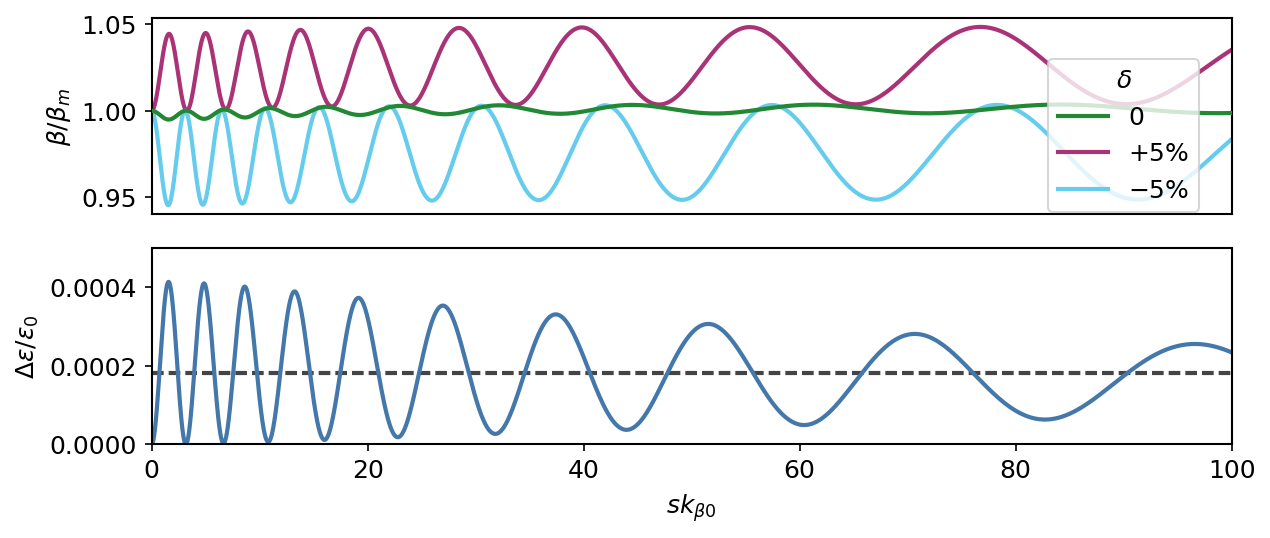

In [5]:
# The complicated emittance growth and chromatic beam evolution plot
N = 5000
beta0 = 1.0
alpha0 = 0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 0.1
z = np.linspace(0, 100, N)
frac = 1/(1+(a*z)**2)
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)
beta1, alpha1, gamma1, gb1 = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0*1.05, dgdz0, ne0)
betan1, alphan1, gamman1, gbn1 = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0*0.95, dgdz0, ne0)

betam = 1/np.sqrt(frac)
#betam = 1

# Calculate the emittance growth
M = 500
delta = np.linspace(-0.05, 0.05, M)
gb0A = 20000*(1+delta)
betaDelta = np.zeros((M, N), dtype='double')
alphaDelta = np.zeros((M, N), dtype='double')
gammaDelta = np.zeros((M, N), dtype='double')
for i in range(M):
    betaDelta[i,:], alphaDelta[i, :], gammaDelta[i, :], gb = ecalc.cs_propagation(z,ne, beta0, alpha0, gb0A[i],
                                                                                  dgdz0, ne0)
    
betaP = np.average(betaDelta, axis=0)
alphaP = np.average(alphaDelta, axis=0)
gammaP = np.average(gammaDelta, axis=0)
eps = np.sqrt(betaP*gammaP-alphaP**2)
avgeps = np.average(eps)

# Plotting
#------------------------------------------------------------------------------------
plt.figure(figsize=(8.63, 3.75), dpi=150)
gs = gridspec.GridSpec(2, 1)

# Plot of the beam evolution
ax = plt.subplot(gs[0, 0])
plt.plot(z, np.array(beta)/betam, c=green, zorder=3)
plt.plot(z, np.array(beta1)/betam, c=purple)
plt.plot(z, np.array(betan1)/betam, c=cyan)
plt.plot()
ax.get_xaxis().set_visible(False)
plt.ylabel(r'$\beta/\beta_m$')
plt.legend([r'$0$', r'$+5\%$', r'$-5\%$'], title=r'$\delta$',
           bbox_to_anchor=(0.9, 0.4), loc='center')
plt.xlim(0,100)

# Plot of the emittance growth
plt.subplot(gs[1, 0])
plt.plot(z, eps-1)
plt.plot([0, 100], [avgeps-1, avgeps-1], 'k--', c=grey, zorder=1)
plt.xlabel(r'$s k_{\beta0}$')
plt.ylabel(r'$\Delta\epsilon/\epsilon_0$')
plt.xlim(0, 100)
plt.ylim(0, 0.0005)

#plt.text(60, 0.0003, r'Average emittance growth', color=grey, fontsize=denSize)

plt.tight_layout()
plt.savefig('Chromatic_Adiabatic.svg')
plt.show()

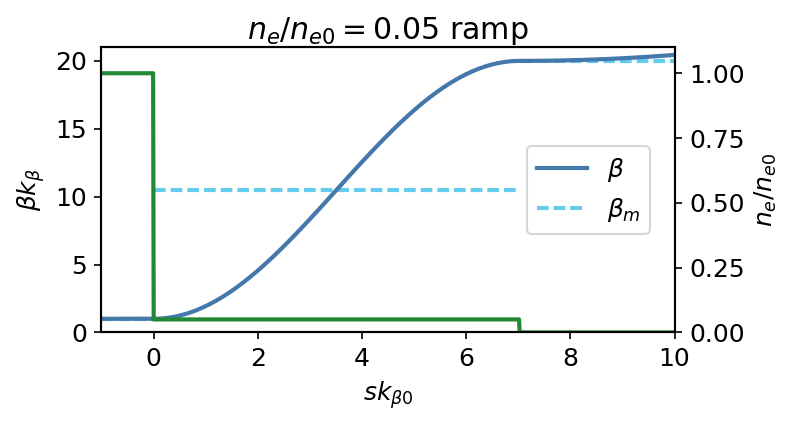

In [6]:
# Lets plot some example square ramps
theta = lambda s: 2*np.sqrt(eta)*s
betaA = lambda s: np.real((B0/2-(a0**2+1)/eta/B0/2+1j*a0/np.sqrt(eta))*np.exp(1j*theta(s))
                          + (B0/2+(a0**2+1)/eta/B0/2))
betaD = lambda s: B0+s**2/B0

N = 1000
B0 = 20
a0 = 0
eta = 0.05
L = np.pi/(2*np.sqrt(eta))
s = np.linspace(-1, 10, N)
sel = [s > L, (s <= L) & (s > 0), s <= 0]
ne = np.piecewise(s, sel, [0, eta, 1.0])
beta = np.zeros(N)
beta[sel[0]] = betaD(s[sel[0]]-L)
beta[sel[1]] = betaA(s[sel[1]]+L)
beta[sel[2]] = 1.0
center = (B0/2+(a0**2+1)/eta/B0/2)

plt.figure(figsize=(5.35, 3), dpi=150)
plt.plot(s, beta)
plt.plot([L, 10], [B0, B0], 'k--', c=cyan, zorder=1)
plt.plot([0, L], [center, center], 'k--', c=cyan, zorder=1)
plt.plot([-1, 0], [1.0, 1.0], 'k--', c=cyan, zorder=1)
plt.title(r'$n_{e}/n_{e0}=0.05$ ramp')
plt.xlabel(r'$s k_{\beta0}$')
plt.ylabel(r'$\beta k_\beta$')
plt.ylim(0.0, 21)
plt.legend([r'$\beta$', r'$\beta_m$'], bbox_to_anchor=(0.85, 0.5), loc='center')
plt.twinx()
plt.plot(s, ne, c=green)
plt.ylabel(r'$n_{e}/n_{e0}$')
plt.xlim(-1, 10)
plt.ylim(0, 1.1)
plt.tight_layout()
plt.savefig('Box_Ramp.svg')
plt.show()

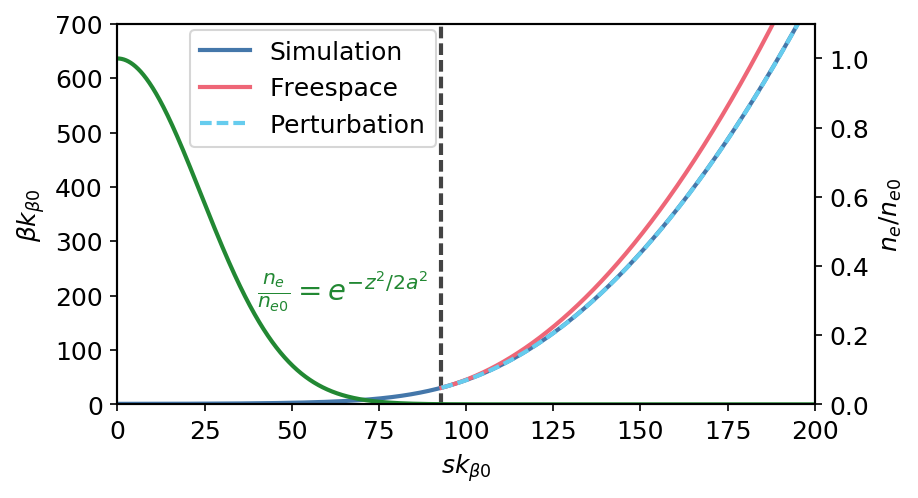

In [7]:
N = 3500
beta0 = 1
alpha0 = 0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 24
z = np.linspace(0, 200, N)
frac = np.exp(-z**2/(2*a**2))
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

cutoff = .85

zTran = z[-np.array(alpha)>cutoff]
fracTran = frac[-np.array(alpha)>cutoff]
neTran = np.zeros(len(zTran))
tran1 = z[-np.array(alpha)<=cutoff][-1]
betaTran = np.array(beta)[-np.array(alpha)<=cutoff][-1]
alphaTran = np.array(alpha)[-np.array(alpha)<=cutoff][-1]
zint = zTran-zTran[0]
dz = zint[1]-zint[0]
I0 = np.cumsum(fracTran)*dz
I1 = np.cumsum(zint*fracTran)*dz
I2 = np.cumsum(zint*zint*fracTran)*dz
gammaTran = (1+alphaTran**2)/betaTran
betas = 1/(gammaTran+2*(alphaTran*I0[-1]-gammaTran*I1[-1]))
M11 = 1-I0*zint+I1
M12 = zint-I1*zint+I2
betaPer = M11**2*betaTran - 2*M11*M12*alphaTran + M12**2*gammaTran


beta2, alpha2, gamma2, gb2 = ecalc.cs_propagation(zTran, neTran, betaTran, alphaTran, gb0, dgdz0, ne0)

plt.figure(figsize=(6, 3.36), dpi=150)
plt.plot(z, beta)
plt.plot(zTran, beta2, )
plt.plot(zTran, betaPer, '--', c=cyan)
plt.plot([tran1, tran1], [-1, 1000], 'k--', c=grey, zorder=0)
plt.xlabel(r'$s k_{\beta0}$')
plt.ylabel(r'$\beta k_{\beta0}$')
plt.legend([r'Simulation', 'Freespace', 'Perturbation'], bbox_to_anchor=(0.28, 0.83), loc='center')
plt.ylim(0, 700)
plt.twinx()
plt.plot(z, frac, c=green)
plt.text(40, .3, r'$\frac{n_e}{n_{e0}}=e^{-z^2/2a^2}$', color=green, fontsize=denSize)
#plt.plot(z, z*np.exp(z**2/(4*a**2))/a**2, 'c')
#plt.yscale('log')
plt.ylim(0, 1.1)
plt.ylabel(r'$n_{e}/n_{e0}$')
plt.xlim(0, 200)
plt.savefig('Perturbed_Evolution.svg')
plt.show()

I0 0.0377190946123
I1 0.0749988969319
I2 0.234994198327
9.979058765310151


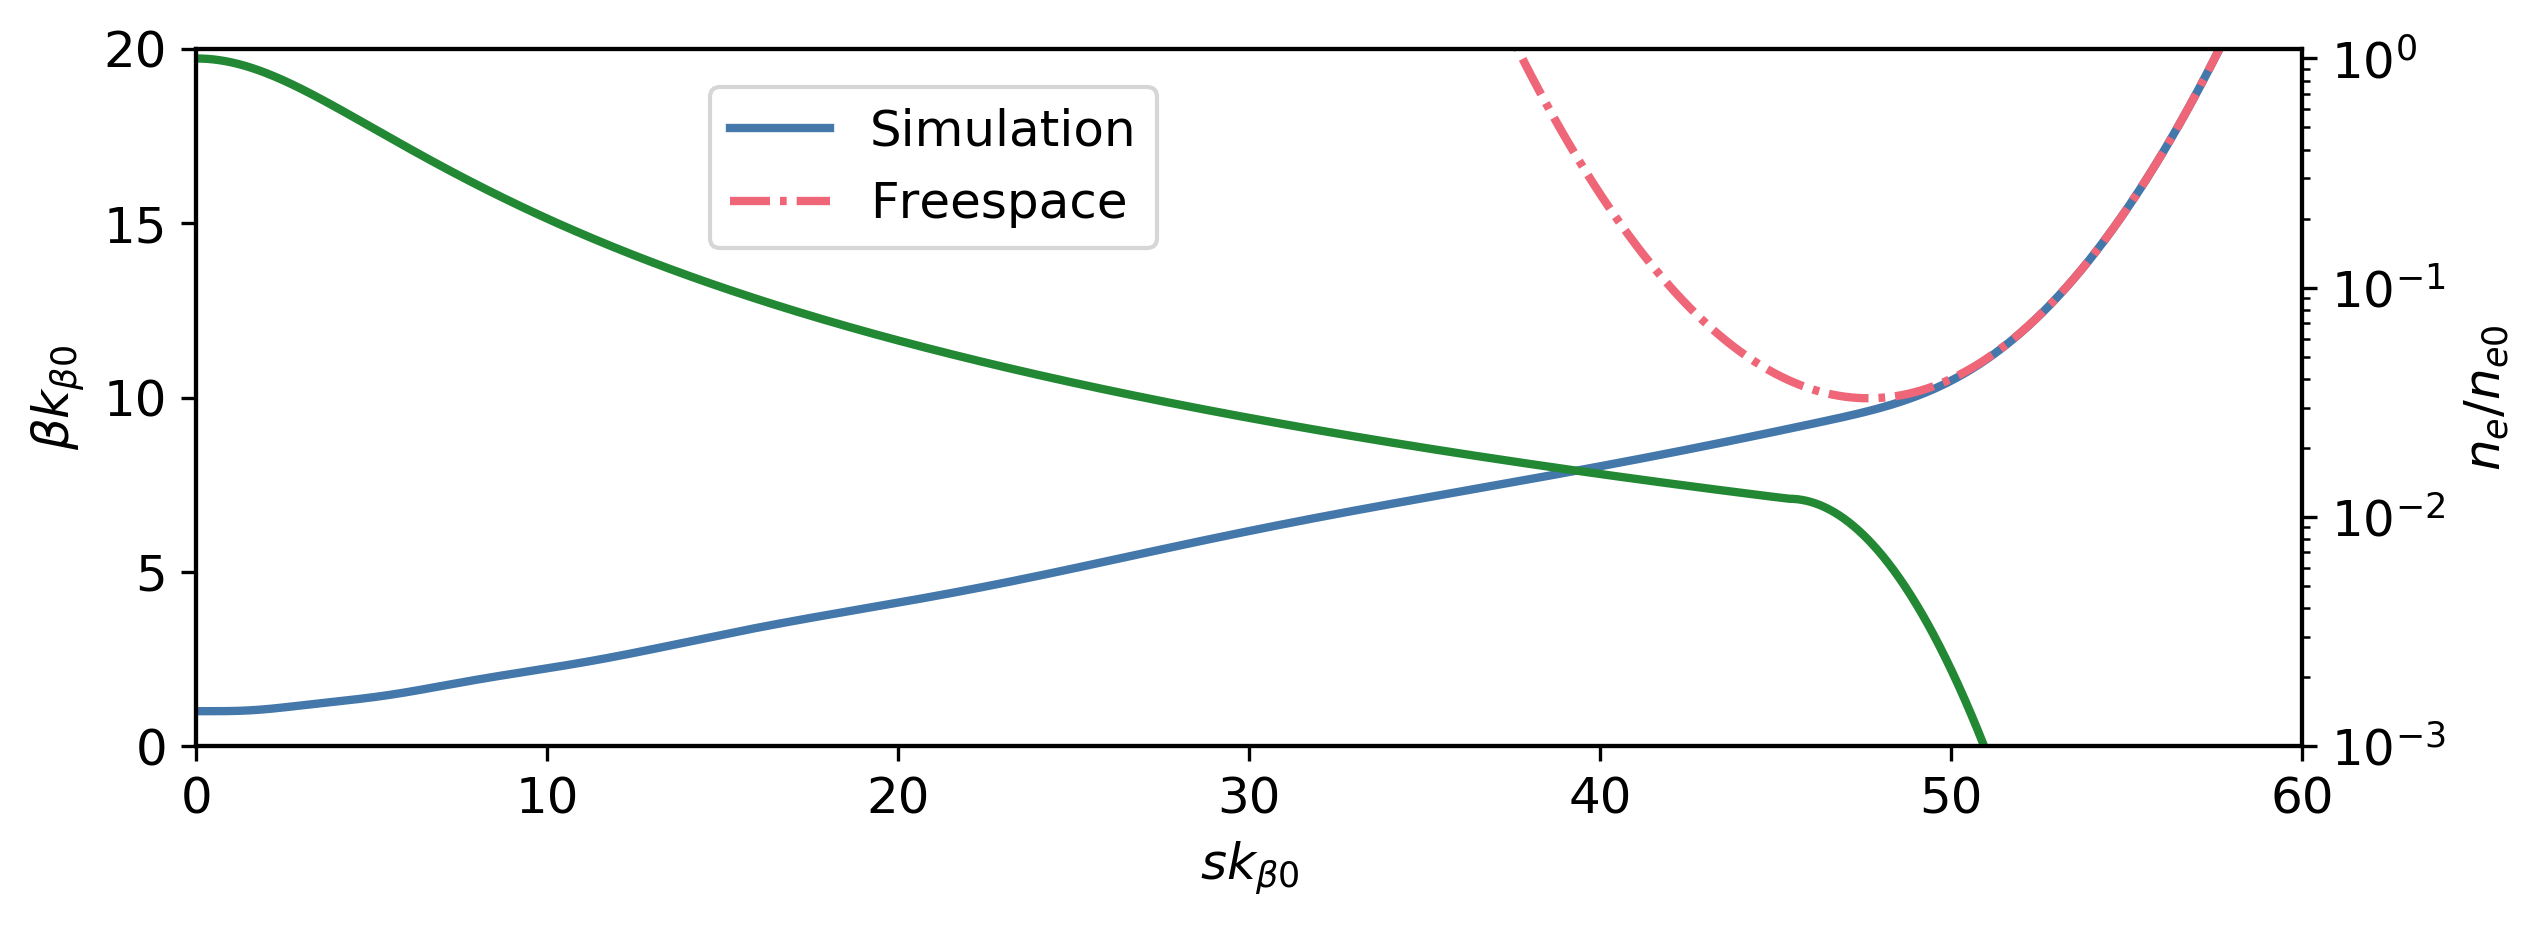

In [8]:
# Designer ramp
N = 5000
beta0 = 1.0
alpha0 = 0.0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 0.2
z = np.linspace(0, 100, N)
frac = 1/(1+(a*z)**2)
sel = frac < 0.012
tran = z[sel][0]
ztran = z[sel]
sigma = 2.5
frac[sel] = frac[sel][0]*np.exp(-(ztran - z[sel][0])**2/(2*sigma**2))
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

# Calculate free space propagation
bs = 1/gamma[-1]
ss = alpha[-1]*bs + 100
betaFree = (z-ss)**2/bs+bs

# Calculate perturbed solution
zTran = z[sel]
fracTran = frac[sel]
neTran = np.zeros(len(zTran))
tran1 = z[sel][-1]
betaTran = np.array(beta)[sel][1]
alphaTran = np.array(alpha)[sel][1]
zint = zTran-zTran[0]
dz = zint[1]-zint[0]
I0 = np.cumsum(fracTran)*dz
I1 = np.cumsum(zint*fracTran)*dz
I2 = np.cumsum(zint*zint*fracTran)*dz
print('I0', I0[-1])
print('I1', I1[-1])
print('I2', I2[-1])
gammaTran = (1+alphaTran**2)/betaTran
betas = 1/(gammaTran+2*(alphaTran*I0[-1]-gammaTran*I1[-1]))
M11 = 1-I0*zint+I1
M12 = zint-I1*zint+I2
betaPer = M11**2*betaTran - 2*M11*M12*alphaTran + M12**2*gammaTran

print(bs)

plt.figure(figsize=(8.63, 3.25), dpi=300)
plt.plot(z, beta)
plt.plot(z, betaFree, '-.')
#plt.plot(zTran, betaPer, '--', c=purple)
#plt.plot(z, 1/np.sqrt(frac), c=cyan, zorder=1)
plt.xlabel(r'$s k_{\beta0}$')
plt.ylabel(r'$\beta k_{\beta0}$')
plt.legend([r'Simulation', r'Freespace'], bbox_to_anchor=(0.35, 0.83), loc='center')
plt.ylim(0, 20)
plt.twinx()
plt.plot(z, frac, c=green)
plt.ylim(1e-3, 1.1)
plt.ylabel(r'$n_{e}/n_{e0}$')
plt.xlim(0, 60)
plt.yscale('log')
plt.tight_layout()
plt.savefig('Example_Ramp.svg')
plt.show()

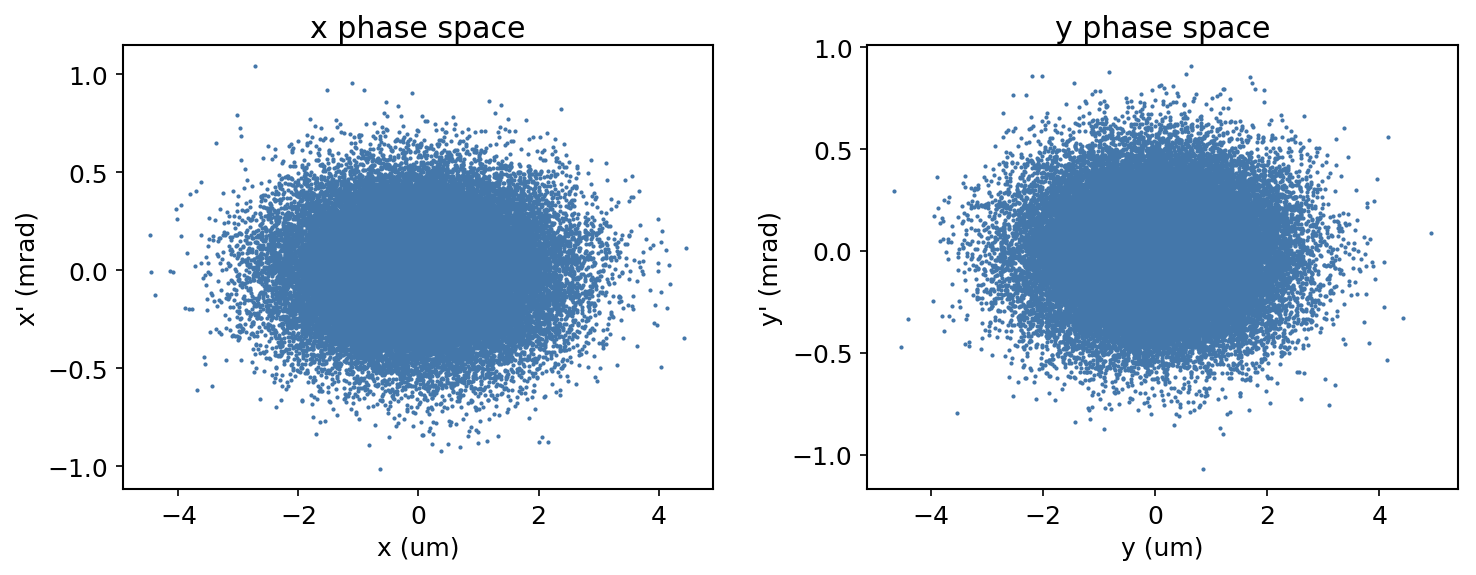

In [9]:
# Run the matched simulation for the animation
import numpy as np
from beam.beams import electronbeam
import matplotlib.pyplot as plt
from beam import interactions
from ionization import ionization
from lens import profile
import beam.calc.electron as ecalc
import scipy.constants as const

# Need to fix path
path = '/media/robert/Data_Storage/Data/Plots/AAC-2018/'
Nz = 600
s = np.linspace(0, 0.2, Nz, dtype='double')
z = s*1e6
ne = 0.5*np.ones(Nz)
# Now we can test my code and see if it is different
kb = 5.95074e4 * np.sqrt(ne[0])/np.sqrt(2*20000)
betaBeam = 1/kb
alphaBeam = 0
electronParams = {
    'name' : 'AAC-2018Matched',
    'path' : path,
    'load' : False,
    'N' : 50000,
    'gamma' : 20000,
    'emittance' : 5.0e-6,
    'betax' : betaBeam,
    'betay' : betaBeam,
    'alphax' : alphaBeam,
    'alphay' : alphaBeam,
    'sigmaz' : 5e-6,
    'dE' : 0.1
}

beam = electronbeam.GaussianElectronBeam(electronParams)
#beam = electronbeam.ElectronBeam(electronParams)
beam.plot_current_phase()

class plasmaCls():
    def __init__(self):
        """ Empy init function """
    def get_ne(self, z):
        return 0.5*np.ones(Nz)
    def dgammadz(self, ne):
        return 0.0
    
plasmaDen = plasmaCls()
dumpPer = 1
interactions.electron_plasma(beam, plasmaDen, z, dumpPer, 1)
beta, alpha, gamma, gb = ecalc.cs_propagation(z*1e-6, ne, betaBeam, alphaBeam, 20000, 0, 0.5)

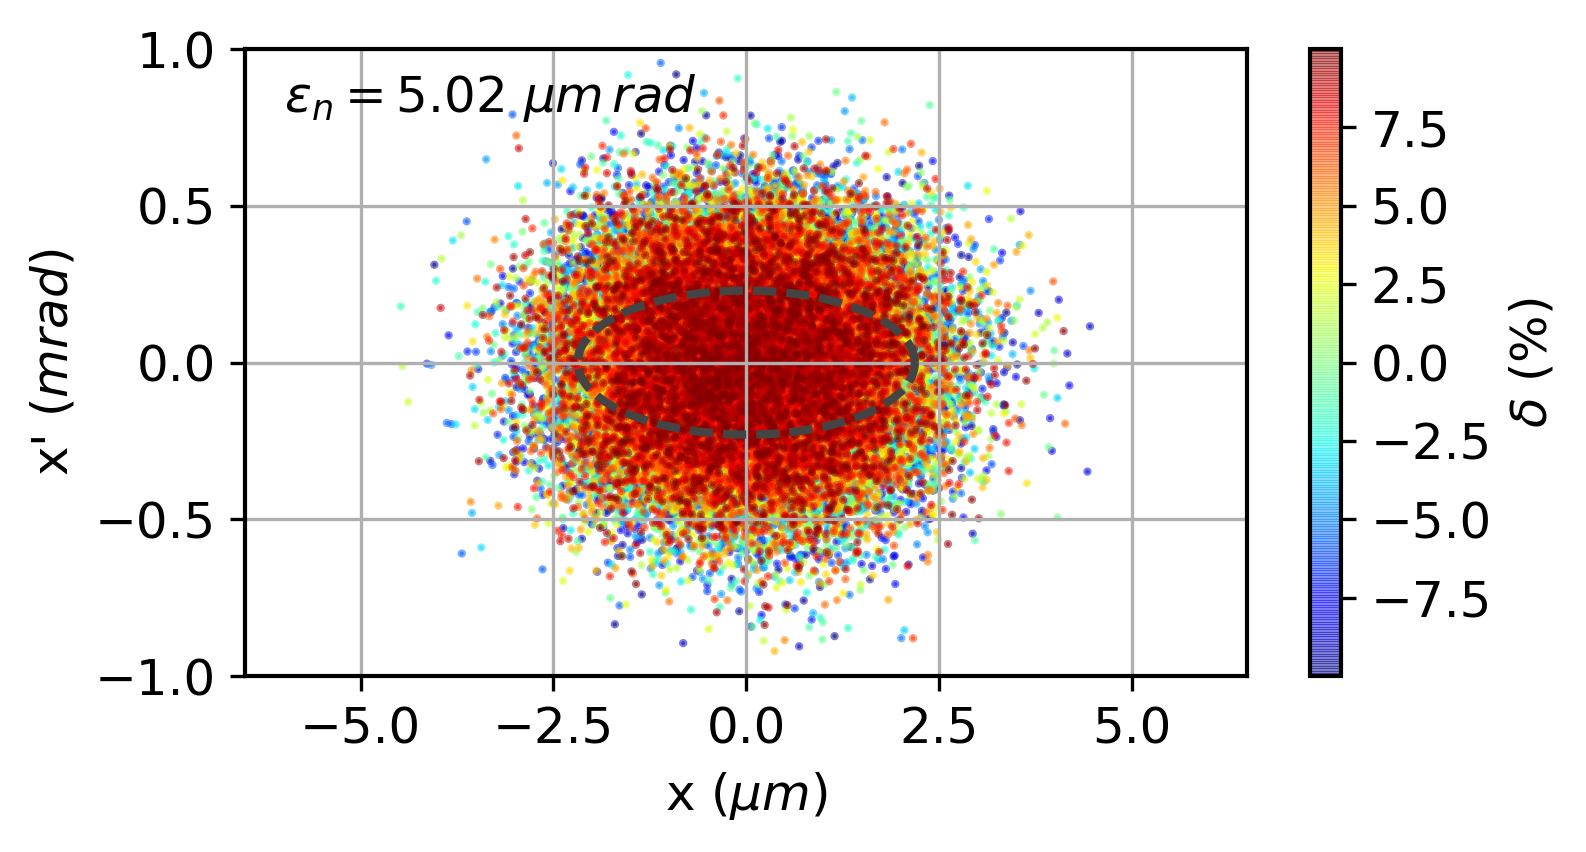

Frame 30 completed
Frame 60 completed
Frame 90 completed
Frame 120 completed
Frame 150 completed
Frame 180 completed
Frame 210 completed
Frame 240 completed
Frame 270 completed
Frame 300 completed
Frame 330 completed
Frame 360 completed
Frame 390 completed
Frame 420 completed
Frame 450 completed
Frame 480 completed
Frame 510 completed
Frame 540 completed
Frame 570 completed
Frame 600 completed


In [10]:
# This needs to be before animation is imported
plt.rcParams['animation.ffmpeg_path'] = '/home/robert/anaconda3/envs/CU-PWFA/bin/ffmpeg'
import matplotlib.animation as animation

for i in range(0, Nz):
    ptcls = beam.load_ptcls(i)[0]

ind = 0
# Grab the dump we are interested in
def get_data(ind):
    ptcls, z = beam.load_ptcls(ind)
    ptx = ptcls[:, 0]*1e6
    ptxp = ptcls[:, 1]*1e3
    gamma = ptcls[:, 5]
    sort = np.argsort(gamma)
    ptx = ptx[sort]
    ptxp = ptxp[sort]
    gamma = gamma[sort]
    delta = (gamma/20000 - 1)*100
    return ptx, ptxp, delta

def calc_em(x, xp):
    dx = x - np.average(x)
    dxp = xp - np.average(xp)
    # Calculate the RMS sizes and the correlation
    sigmax2 = np.average(dx**2)
    sigmaxp2 = np.average(dxp**2)
    sigmaxxp = np.average(dx*dxp)
    ex = np.sqrt(sigmax2*sigmaxp2 - sigmaxxp**2)
    beta = sigmax2/ex
    alpha = -sigmaxxp/ex
    return beta, alpha, ex
    
# Get the first piece of data
ptx, ptxp, gamma = get_data(ind)
beta, alpha, ex = calc_em(ptx, ptxp)

# Create the emittance ellipse plot
t = np.linspace(0, 2*np.pi, 300)

# Create the plot
fig = plt.figure(figsize=(5.45, 3), dpi=300)
sct = plt.scatter(ptx, ptxp, c=gamma, cmap=plt.cm.get_cmap('jet'), 
                      s=1.0, alpha=0.5)
em = plt.plot(2*np.sqrt(beta*ex)*np.cos(t), 2*np.sqrt(ex/beta)*(-alpha*np.cos(t)+np.sin(t)), 'k--', c=grey)[0]
emText = plt.text(-6, .8, r'$\epsilon_n=$%0.2f $\mu m\,rad$' % (ex*20))
elements = [sct, em, emText]

# Formatting stuff
cb = plt.colorbar()
cb.set_label(r'$\delta$ (%)')
plt.xlabel(r'x ($\mu m$)')
plt.ylabel(r"x' ($mrad$)")
plt.xlim(-6.5, 6.5)
plt.ylim(-1, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

# Update the scatter plot data
i = ind+1;
def updatefig(*args):
    global i
    ptx, ptxp, gamma = get_data(i)
    beta, alpha, ex = calc_em(ptx, ptxp)
    sct.set_offsets(np.stack((ptx, ptxp), axis=-1))
    sct.set_array(gamma)
    em.set_data(2*np.sqrt(beta*ex)*np.cos(t), 2*np.sqrt(ex/beta)*(-alpha*np.cos(t)+np.sin(t)))
    emText.set_text(r'$\epsilon_n=$%0.2f $\mu m\,rad$' % (ex*20))
    i += 1
    # If we run over, loop
    if i == Nz+1:
        i = ind
    if i % 30 == 0:
        print("Frame", i, "completed")
    return elements

ani = animation.FuncAnimation(fig, updatefig, blit=True, frames=Nz-ind-3)
ani.save('MatchedBeam.mp4', fps=30)

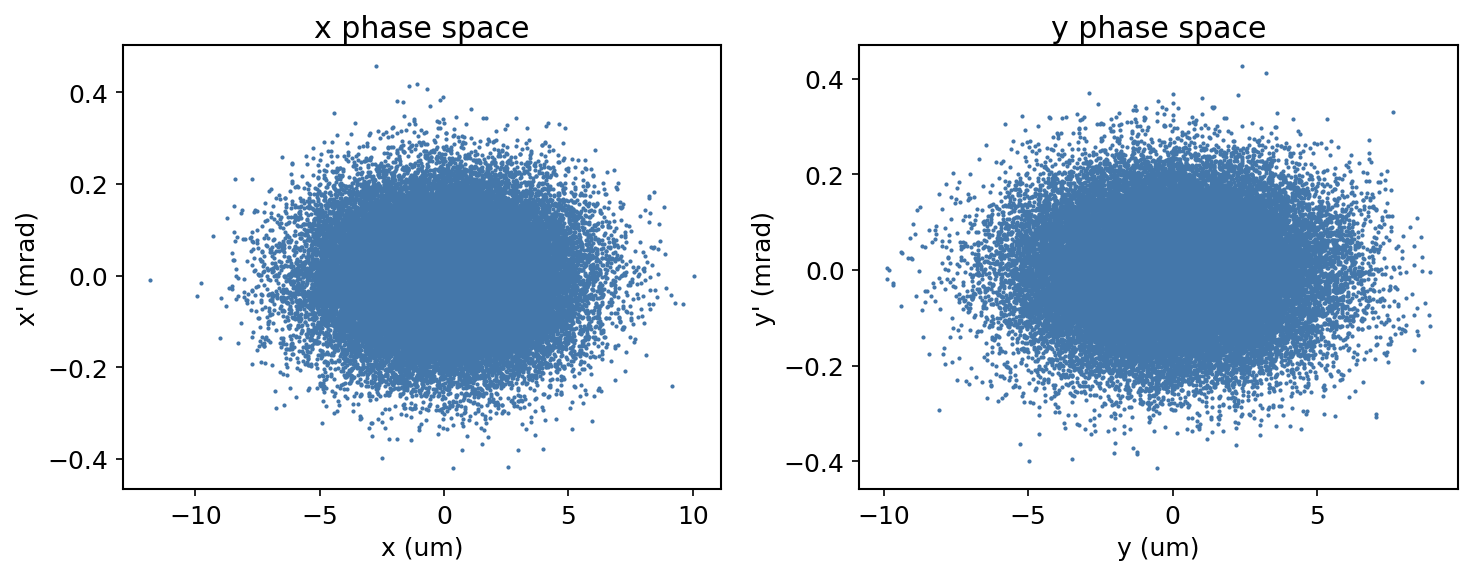

In [11]:
# Run the unmatched simulation for the animation

# Need to fix path
path = '/media/robert/Data_Storage/Data/Plots/AAC-2018/'
# Now we can test my code and see if it is different
betaBeam = 25e-3
alphaBeam = 0
electronParams = {
    'name' : 'AAC-2018UnMatched',
    'path' : path,
    'load' : False,
    'N' : 50000,
    'gamma' : 20000,
    'emittance' : 5.0e-6,
    'betax' : betaBeam,
    'betay' : betaBeam,
    'alphax' : alphaBeam,
    'alphay' : alphaBeam,
    'sigmaz' : 5e-6,
    'dE' : 0.1
}

beam = electronbeam.GaussianElectronBeam(electronParams)
#beam = electronbeam.ElectronBeam(electronParams)
beam.plot_current_phase()
    
plasmaDen = plasmaCls()
dumpPer = 1
interactions.electron_plasma(beam, plasmaDen, z, dumpPer, 1)
beta, alpha, gamma, gb = ecalc.cs_propagation(z*1e-6, ne, betaBeam, alphaBeam, 20000, 0, 0.5)

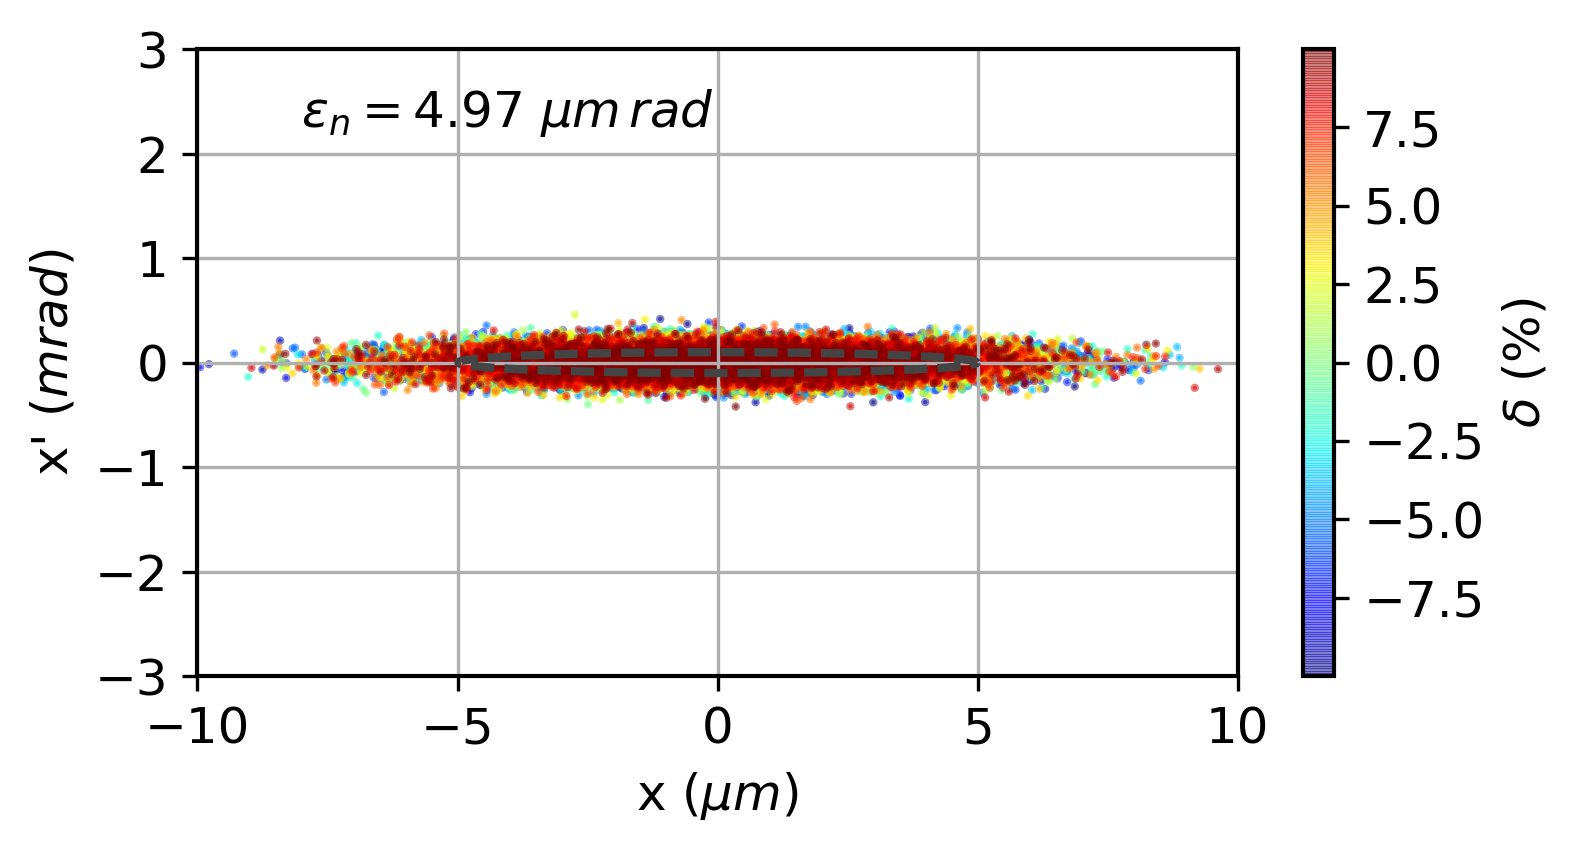

Frame 30 completed
Frame 60 completed
Frame 90 completed
Frame 120 completed
Frame 150 completed
Frame 180 completed
Frame 210 completed
Frame 240 completed
Frame 270 completed
Frame 300 completed
Frame 330 completed
Frame 360 completed
Frame 390 completed
Frame 420 completed
Frame 450 completed
Frame 480 completed
Frame 510 completed
Frame 540 completed
Frame 570 completed
Frame 600 completed


In [12]:
for i in range(0, Nz):
    ptcls = beam.load_ptcls(i)[0]

ind = 0  
# Get the first piece of data
ptx, ptxp, gamma = get_data(ind)
beta, alpha, ex = calc_em(ptx, ptxp)

# Create the emittance ellipse plot
t = np.linspace(0, 2*np.pi, 300)

# Create the plot
fig = plt.figure(figsize=(5.45, 3), dpi=300)
sct = plt.scatter(ptx, ptxp, c=gamma, cmap=plt.cm.get_cmap('jet'), 
                      s=1.0, alpha=0.5)
em = plt.plot(2*np.sqrt(beta*ex)*np.cos(t), 2*np.sqrt(ex/beta)*(-alpha*np.cos(t)+np.sin(t)), 'k--', c=grey)[0]
emText = plt.text(-8, 2.25, r'$\epsilon_n=$%0.2f $\mu m\,rad$' % (ex*20))
elements = [sct, em, emText]

# Formatting stuff
cb = plt.colorbar()
cb.set_label(r'$\delta$ (%)')
plt.xlabel(r'x ($\mu m$)')
plt.ylabel(r"x' ($mrad$)")
plt.xlim(-10, 10)
plt.ylim(-3, 3)
plt.grid(True)
plt.tight_layout()
plt.show()

# Update the scatter plot data
i = ind+1;

ani = animation.FuncAnimation(fig, updatefig, blit=True, frames=Nz-ind-3)
ani.save('UnMatchedBeam.mp4', fps=30)